In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning (Redes Neurais Multicamadas)

Exemplo da AULA - SÉRIES TEMPORAIS - Prof. Jerônymo Marcondes Pinto <br>
AULA MINISTRADA EM R E TRADUZIDA PARA PYTHON COMO FORMA DE APRENDIZADO.

Rede Neural de Classificação

### Base College

In [2]:
df = pd.read_csv(r'bases\college.csv', sep=",")
df

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [3]:
df = pd.get_dummies(df, columns=['Private'], drop_first=True)

In [4]:
df

,College,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


## Aplicando Padronização

In [5]:
# Selciona Dados

df = df.iloc[:,1:]

In [6]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [7]:
df_std

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963,1.0
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926,1.0
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407,1.0
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704,1.0
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.044071,0.054955,0.079912,0.031579,0.186813,0.093639,0.092878,0.230217,0.334174,0.180036,0.145038,0.547368,0.473684,0.495979,0.218750,0.024186,0.277778,0.0
773,0.039114,0.065999,0.103823,0.242105,0.417582,0.086021,0.050653,0.474174,0.501261,0.224599,0.152672,0.684211,0.671053,0.289544,0.484375,0.113164,0.675926,1.0
774,0.041989,0.070188,0.103823,0.347368,0.571429,0.084243,0.007557,0.235537,0.381463,0.232175,0.081069,0.621053,0.671053,0.319035,0.312500,0.096839,0.361111,1.0
775,0.221273,0.090677,0.201667,0.989474,0.989011,0.161186,0.003755,0.903926,0.745586,0.237968,0.284733,0.926316,0.947368,0.088472,0.765625,0.701265,0.824074,1.0


In [8]:
df_std.Private_Yes.value_counts()

1.0    565
0.0    212
Name: Private_Yes, dtype: int64

## Aplicando Modelo de Redes Neurais de Classificação

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_std.drop('Private_Yes', axis=1), 
                                                    df_std['Private_Yes'], 
                                                    random_state=0, 
                                                    test_size=0.30)

In [10]:
len(X_train), len(X_test)

(543, 234)

Documentação: https://www.tensorflow.org/api_docs/python/tf/keras/activations

Documentação Sequential: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

Referência: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [12]:

modelo = Sequential([
    Dense(17,activation = 'relu'),
    Dense(5,activation = 'relu'),
    Dense(4,activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

In [48]:
# Alterando o Learning-rate do otimizdor
from keras.optimizers import Adam
adam_lr = Adam(learning_rate=0.01)

modelo.compile(optimizer = adam_lr, loss = 'binary_crossentropy', metrics=['accuracy'])

In [49]:
history = modelo.fit(X_train, y_train, batch_size=543, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 463ms/step - loss: 0.3092 - accuracy: 0.9098
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2912 - accuracy: 0.9134
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2755 - accuracy: 0.9116
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2613 - accuracy: 0.9153
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2493 - accuracy: 0.9190
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2386 - accuracy: 0.9171
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.9190
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.9208
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9208
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2118 - accuracy: 0.9208
Epoch 11/100
1/1 [=========

1/1 [==============================] - 0s 3ms/step - loss: 0.1395 - accuracy: 0.9448
Epoch 85/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1389 - accuracy: 0.9448
Epoch 86/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1384 - accuracy: 0.9448
Epoch 87/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1379 - accuracy: 0.9448
Epoch 88/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9448
Epoch 89/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1368 - accuracy: 0.9448
Epoch 90/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1363 - accuracy: 0.9448
Epoch 91/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1358 - accuracy: 0.9448
Epoch 92/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1353 - accuracy: 0.9448
Epoch 93/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1349 - accuracy: 0.9448
Epoch 94/100
1/1 [===============

Max Accuracy: 0.950276255607605


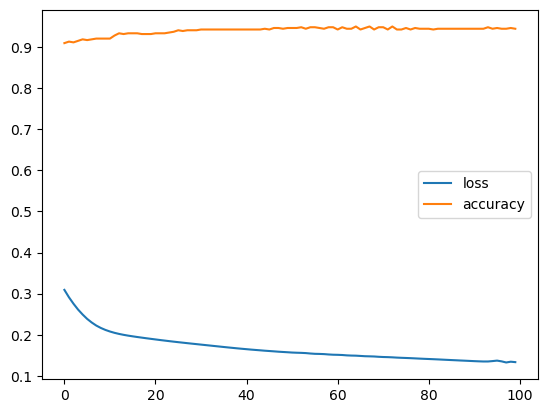

In [50]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'accuracy']].plot();
print("Max Accuracy: {}".format(history_df['accuracy'].max()))

In [51]:
y_hat = (pd.DataFrame(modelo.predict(X_test), columns=['y_hat']).reset_index().drop('index', axis=1).round())
y_hat

8/8 [==============================] - 0s 709us/step


,y_hat
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
229,1.0
230,0.0
231,0.0
232,0.0


## Acurácia

In [52]:
from sklearn.metrics import confusion_matrix

cutoff = 0.5

#predicted_classes = (step_fidelidade.fittedvalues > cutoff).astype(int)

cm = pd.DataFrame(confusion_matrix(y_test, y_hat), 
                  index=['0', '1'],
                  columns=['0', '1'])
cm['Real'] = cm.T.sum()

In [53]:
cm

,0,1,Real
0,57,5,62
1,10,162,172


In [56]:
(57+162)/234

0.9358974358974359

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_hat)

0.9358974358974359

## Comparando com modelo de Árvore de Decisão

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Aplicando o Modelo
model_tree = DecisionTreeClassifier(max_depth = 30, 
                              #ccp_alpha=0.038362, 
                              min_samples_split=2)
reg_tree_poda = model_tree.fit(X_train, y_train)

In [29]:
accuracy_score(y_test,reg_tree_poda.predict(X_test))

0.9188034188034188